In [1]:
import numpy as np 
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [3]:
# train.info()
# test.info()
print(train.columns)
print(train["Parch"].value_counts())
print(train["SibSp"].value_counts())


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:ylabel='Survived'>

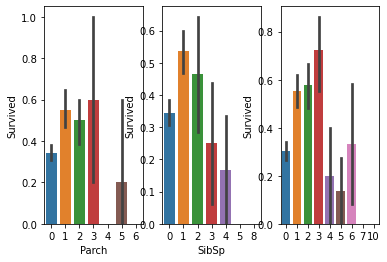

In [4]:
#画图
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.subplot(131)
print(train["Parch"].value_counts())

sns.barplot(x=train.Parch,y=train.Survived)

plt.subplot(132)
print(train["SibSp"].value_counts())
sns.barplot(x=train.SibSp,y=train.Survived)
plt.subplot(133)
family_num=train["SibSp"]+train["Parch"]
sns.barplot(x=family_num,y=train.Survived)

<AxesSubplot:xlabel='familySize', ylabel='Survived'>

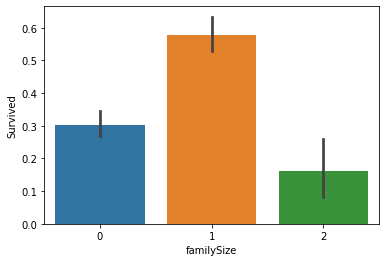

In [5]:
#对parch和SibSp做处理
train["Family_num"]=train["Parch"]+train["SibSp"]+1
test["Family_num"]=test["Parch"]+test["SibSp"]+1
def familysize(familyNum):
    if familyNum==1:
        return 0
    elif (familyNum >=2)&(familyNum<=4):
        return 1
    else:
        return 2 
train["familySize"]=train["Family_num"].map(familysize)
train["familySize"].value_counts()
test["familySize"]=test["Family_num"].map(familysize)
test["familySize"].value_counts()
sns.barplot(data=train,x="familySize",y="Survived")

In [6]:
#利用回归模型 来填补空缺值
from sklearn.ensemble import RandomForestRegressor
data_age=train[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
age_train=data_age.loc[train["Age"].notnull()]
age_test=data_age.loc[train["Age"].isnull()]
X_age_train=age_train[['Fare', 'Parch', 'SibSp', 'Pclass']]
y_age_train=age_train["Age"]
X_age_test=age_test[['Fare', 'Parch', 'SibSp', 'Pclass']]

rfr=RandomForestRegressor()
rfr.fit(X_age_train,y_age_train)

age_predict=rfr.predict(X_age_test)
train.loc[train["Age"].isnull(),["Age"]]=age_predict

none_cloum=test["Age"].isnull()

age_test_test=test.loc[none_cloum,['Fare', 'Parch', 'SibSp', 'Pclass']]
age_predict_test=rfr.predict(age_test_test)
test.loc[none_cloum,["Age"]]=age_predict_test


In [7]:
#数据预处理
train=train.replace(to_replace="?",value=np.nan)
test=test.replace(to_replace="?",value=np.nan)

In [8]:
#直接赋众数
print(train["Embarked"].mode()[0])
print(test["Embarked"].mode()[0])
train["Embarked"].fillna(value="S",inplace=True)
test["Embarked"].fillna(value="S",inplace=True)

#Fare 
test["Fare"].fillna(value=test["Fare"].mean(),inplace=True)

S
S


In [9]:
train["Title"]=train["Name"].map(lambda x:x.split(",")[1].split(".")[0].strip())
train["Title"].value_counts()
test["Title"]=test["Name"].map(lambda x:x.split(",")[1].split(".")[0].strip())
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

train['Title']=train['Title'].map(TitleDict)
train['Title'].value_counts()

test['Title']=test['Title'].map(TitleDict)


In [15]:
train.info()
train.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Family_num   891 non-null    int64  
 13  familySize   891 non-null    int64  
 14  Title        891 non-null    object 
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_num',
       'familySize', 'Title'],
      dtype='object')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Survived'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'Fare'),
  Text(3.5, 0, 'Parch'),
  Text(4.5, 0, 'Pclass'),
  Text(5.5, 0, 'SibSp'),
  Text(6.5, 0, 'Family_num'),
  Text(7.5, 0, 'familySize')])

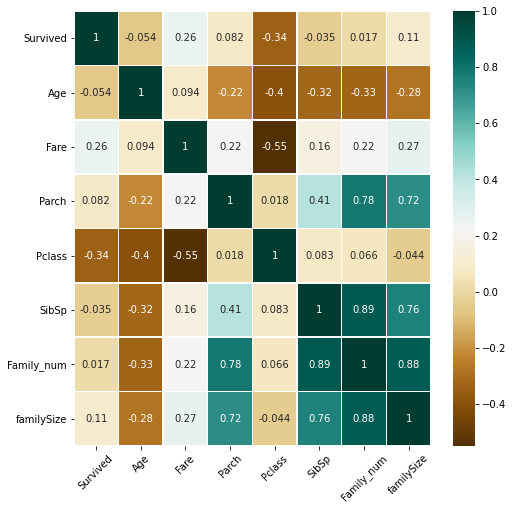

In [17]:

fullSel=train.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)
#热力图查看相关性
plt.figure(figsize=(8,8))
sns.heatmap(fullSel[['Survived','Age','Embarked','Fare','Parch','Pclass',
                    'Sex','SibSp','Title','Family_num','familySize',]].corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)

In [18]:

X_train=train[[ 'Pclass','Sex', 'Age', 
        'Fare',  'Embarked', 
       'familySize', 'Title']]
y_train=train[["Survived"]]

X_test=test[[ 'Pclass','Sex', 'Age', 
        'Fare',  'Embarked', 
       'familySize', 'Title']]

In [19]:
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer()
X_train_vec=vec.fit_transform(X_train.to_dict(orient="record"))
X_test_vec=vec.transform(X_test.to_dict(orient="record"))
print(X_train_vec[0])

  (0, 0)	22.0
  (0, 3)	1.0
  (0, 4)	7.25
  (0, 5)	3.0
  (0, 7)	1.0
  (0, 10)	1.0
  (0, 14)	1.0


D:\anaconda\envs\python36\lib\site-packages\pandas\core\frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


In [21]:
#随机森林搜索树
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
from sklearn.model_selection import cross_val_score
y_train_flatten=y_train.to_numpy().ravel()
print(cross_val_score(rfc,X_train_vec,y_train_flatten,cv=5).mean())

rfc.fit(X_train_vec,y_train_flatten)

0.8058376749733224


RandomForestClassifier()

In [26]:
#保存文件
rfc_y_predict=rfc.predict(X_test_vec)
rfc_submission=pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":rfc_y_predict})
rfc_submission.to_csv("rfc_submission.csv",index=False)

<Figure size 432x288 with 0 Axes>

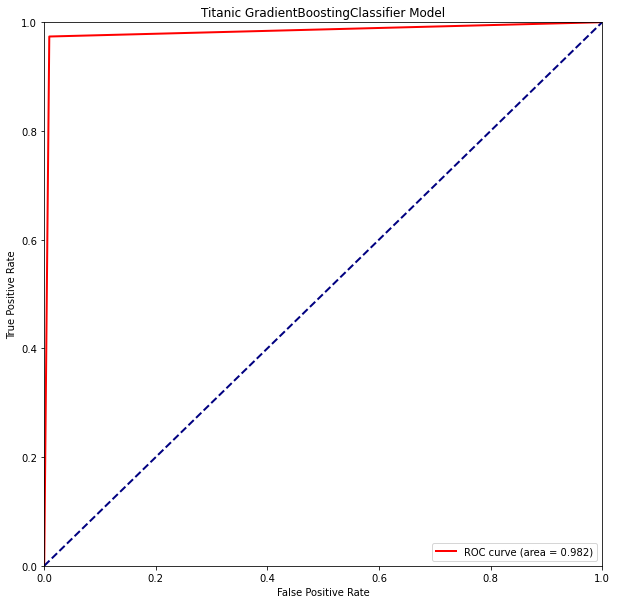

In [22]:
from sklearn.model_selection import GridSearchCV
params={"max_depth":range(2,7),"n_estimators":range(100,1100,200)}
rfc_best=RandomForestClassifier()
gs=GridSearchCV(rfc_best,params,n_jobs=-1,cv=5,verbose=1,refit=True)
%time _=gs.fit(X_train_vec,y_train_flatten)
print(gs.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Wall time: 20.9 s
0.8305128366078716


In [24]:
#保存文件
rfcbest_y_predict=gs.predict(X_test_vec)
rfcbest_submission=pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":rfcbest_y_predict})
rfcbest_submission.to_csv("rfcbest_submission.csv",index=False)

<Figure size 432x288 with 0 Axes>

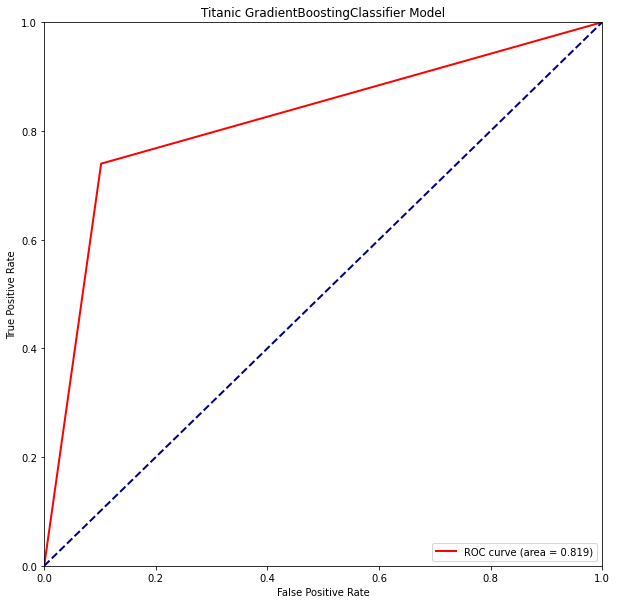

In [29]:
#用网格搜索才是正常的曲线
rfcbest_train_predict=gs.predict(X_train_vec)
#画图
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_train_flatten,rfcbest_train_predict) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic GradientBoostingClassifier Model')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#xgboost
from xgboost import XGBClassifier
xgbc=XGBClassifier()
cross_val_score(xgbc,X_train_vec,y_train_flatten,cv=5).mean()

In [ ]:
#保存文件 xgbc
xgbc.fit(X_train_vec,y_train_flatten)
xgbc_y_predict=xgbc.predict(X_test_vec)
rfc_submission=pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":xgbc_y_predict})
rfc_submission.to_csv("xgbc_submission.csv",index=False)

In [ ]:
#超参数搜索
from sklearn.model_selection import GridSearchCV
params={"max_depth":range(2,7),"n_estimators":range(100,1100,200),"learning_rate":[0.05,0.1,0.5,1.0]}
xgbc_best=XGBClassifier()
gs=GridSearchCV(xgbc_best,params,n_jobs=-1,cv=5,verbose=1,refit=True)
%time _=gs.fit(X_train_vec,y_train_flatten)
print(gs.best_score_)

In [ ]:
xgbc_best_y_predict=gs.predict(X_test_vec)

xgbc_best_submission=pd.DataFrame({"PassengerId":test["PassengerId"],"Survived":xgbc_best_y_predict})
xgbc_best_submission.to_csv("xgbc_best_submission.csv",index=False)